## My exploration through the sea of fraud...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://images.memes.com/meme/592575")

Let's get hold of that csv and walk through the basics

In [2]:
df=pd.read_csv('creditcard.csv')
test=df.copy()

In [3]:
df.shape

(284807, 31)

The description mentioned that the data is from "transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions."     

Also, "due to confidentiality issues, we cannot provide the original features and more background information about the data"    

So we have 28 features from PCA analysis, Amount, Transaction Time, and Class (identifying Fraud or Not).


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


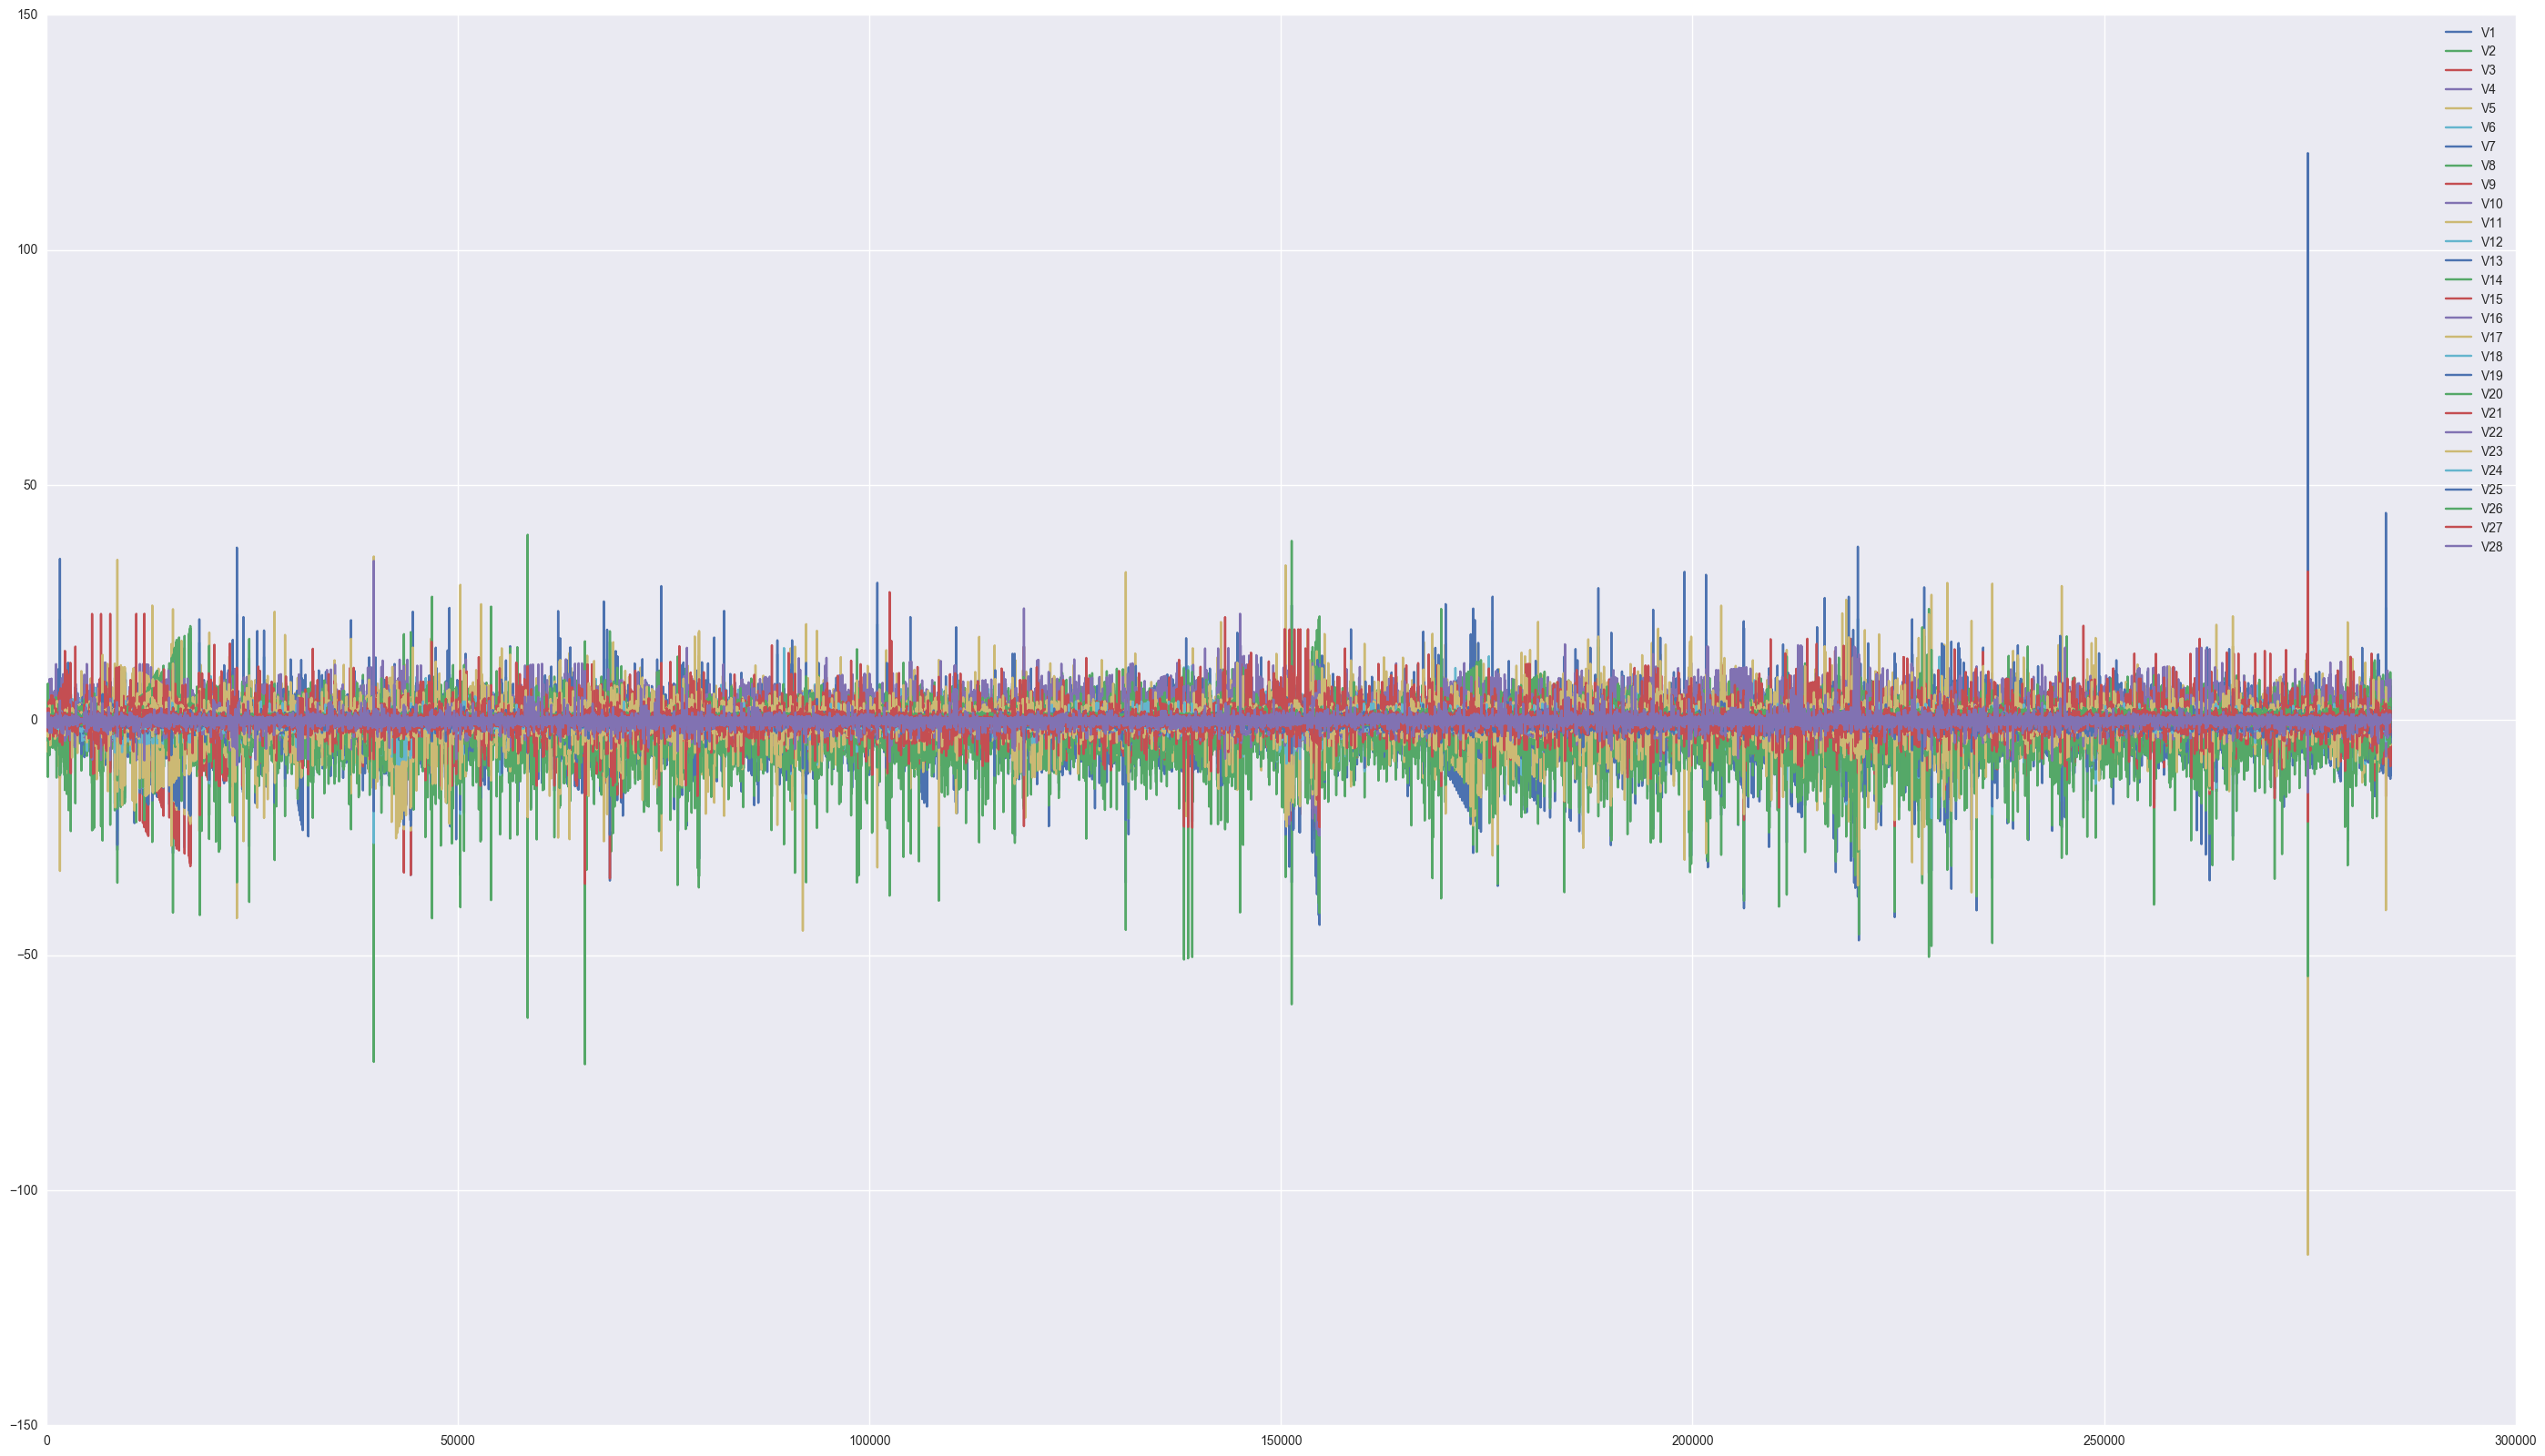

In [6]:
plt.figure(figsize=(35,20))
plt.plot(df.drop(['Time','Amount','Class'],axis=1))
plt.legend(df.drop(['Time','Amount','Class',],axis=1).columns)
plt.show()

In [7]:
Image(url= "http://s2.quickmeme.com/img/db/dbc97d3b537a3b38f323b2cd9e97228de9342018e72bb18e3b36ec235a8783f5.jpg")

Let's look a little more closely this time. At one of the secretive "features"

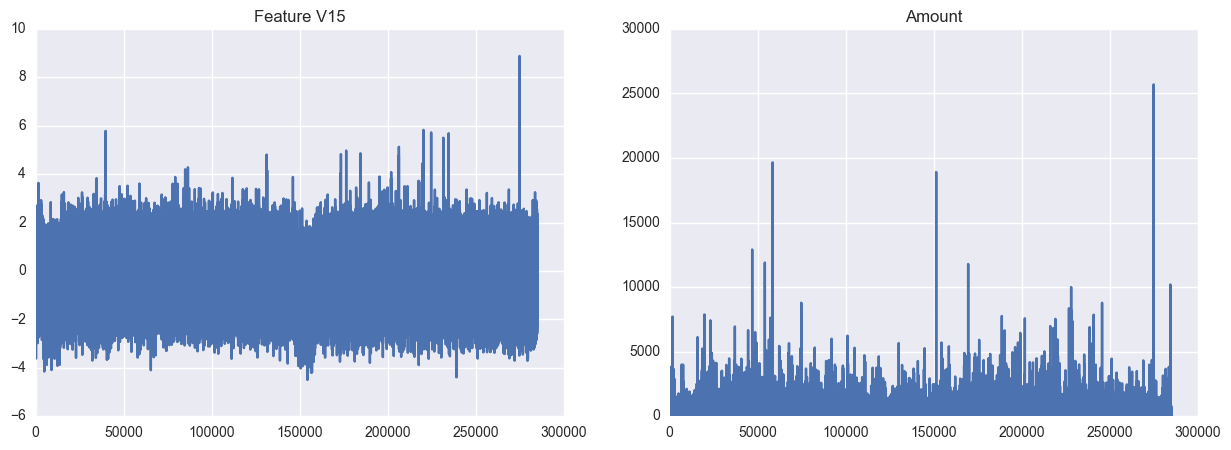

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Feature V15')
#ax1.set_yaxis('Value')
ax1.plot(df['V15'])

ax2.set_title('Amount')
#ax2.yaxis('Value')
ax2.plot(df['Amount'])

f.set_figheight(5)
f.set_figwidth(15)



The amount feature seems to be interesting. Lets see if there is any direct correlation and if we can map it

In [9]:
Image(url='https://i.imgflip.com/1htaug.jpg',)

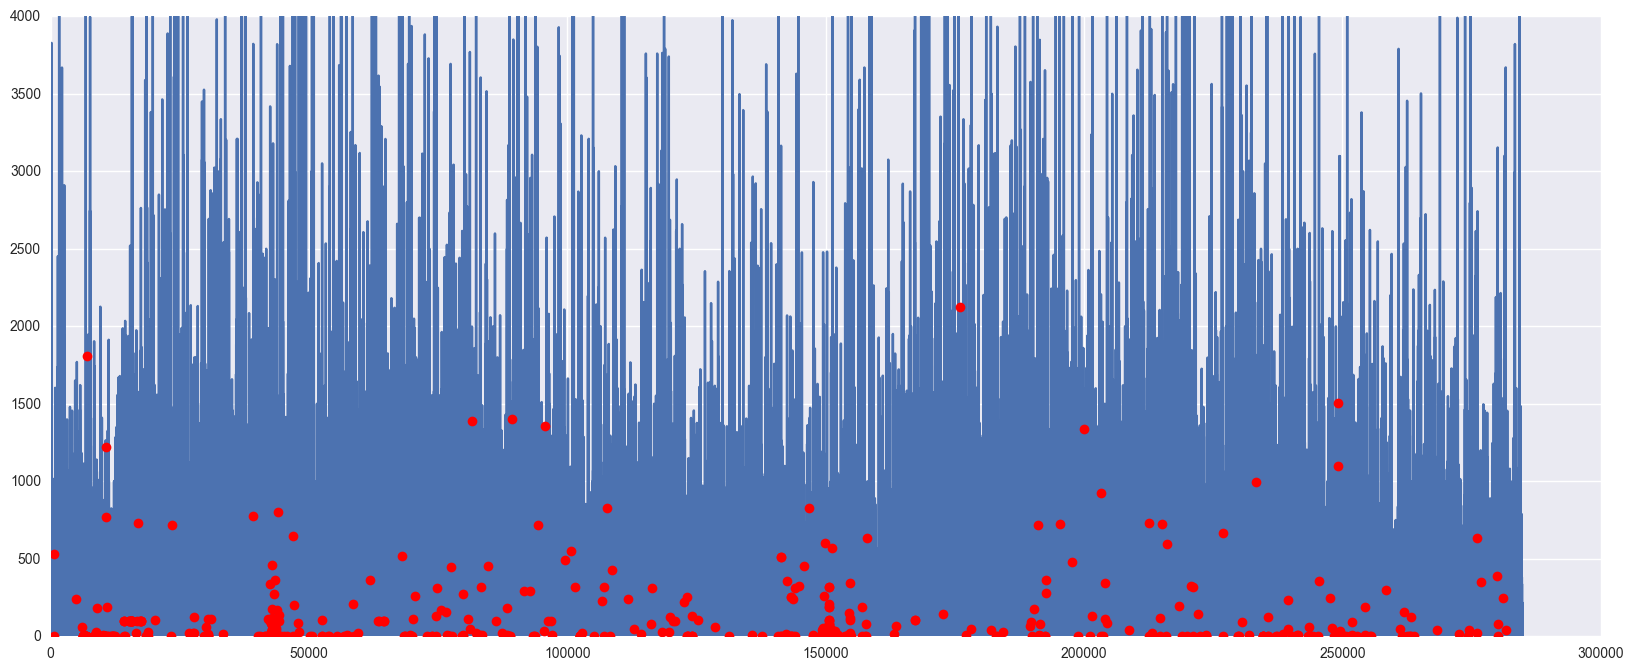

In [10]:
plt.figure(figsize=(20,8))
plt.ylim(0,4000)
plt.plot(df['Amount'])
plt.plot(df[df['Class']==1]['Amount'],'ro')
plt.show()

There are no fraud transactions above $2,500 in the dataset. So that can be a big influencing factor.

I started doing my analysis forgetting that I had to change the Time feature to make the data more informative. So let's do that first. So each time stamp is the time elapsed from the first one (in seconds).

In [11]:
df['Time'][284806]/(60*60*24)  #The data provided is for almost 2 days 
                               #which is also mentioned in the dataset description -_-

1.9999074074074075

Let's try to reformat the values in such a way that after one day it goes back to zero. Then maybe we can observe some trend based on the time of day. 

### This small change actaully improved the accuracy beyond 99%

In [12]:
pos=np.where(df['Time'].values >= 60*60*24)
df['Time'].values[pos]=df['Time'].values[pos]-60*60*24


Let's try some feature selection techniques.    

#### Removing features with low variance. (have constant value)

In [13]:
from sklearn.feature_selection import VarianceThreshold
feat=df.iloc[:,0:df.shape[1]-1]

X=feat.values
y=df['Class'].values

sel = VarianceThreshold()
sel.fit_transform(X).shape

(284807, 30)

The shape is same as that of the original dataset. Thus, none of the features could be eliminated thorugh this method.

#### Tree based feature selection

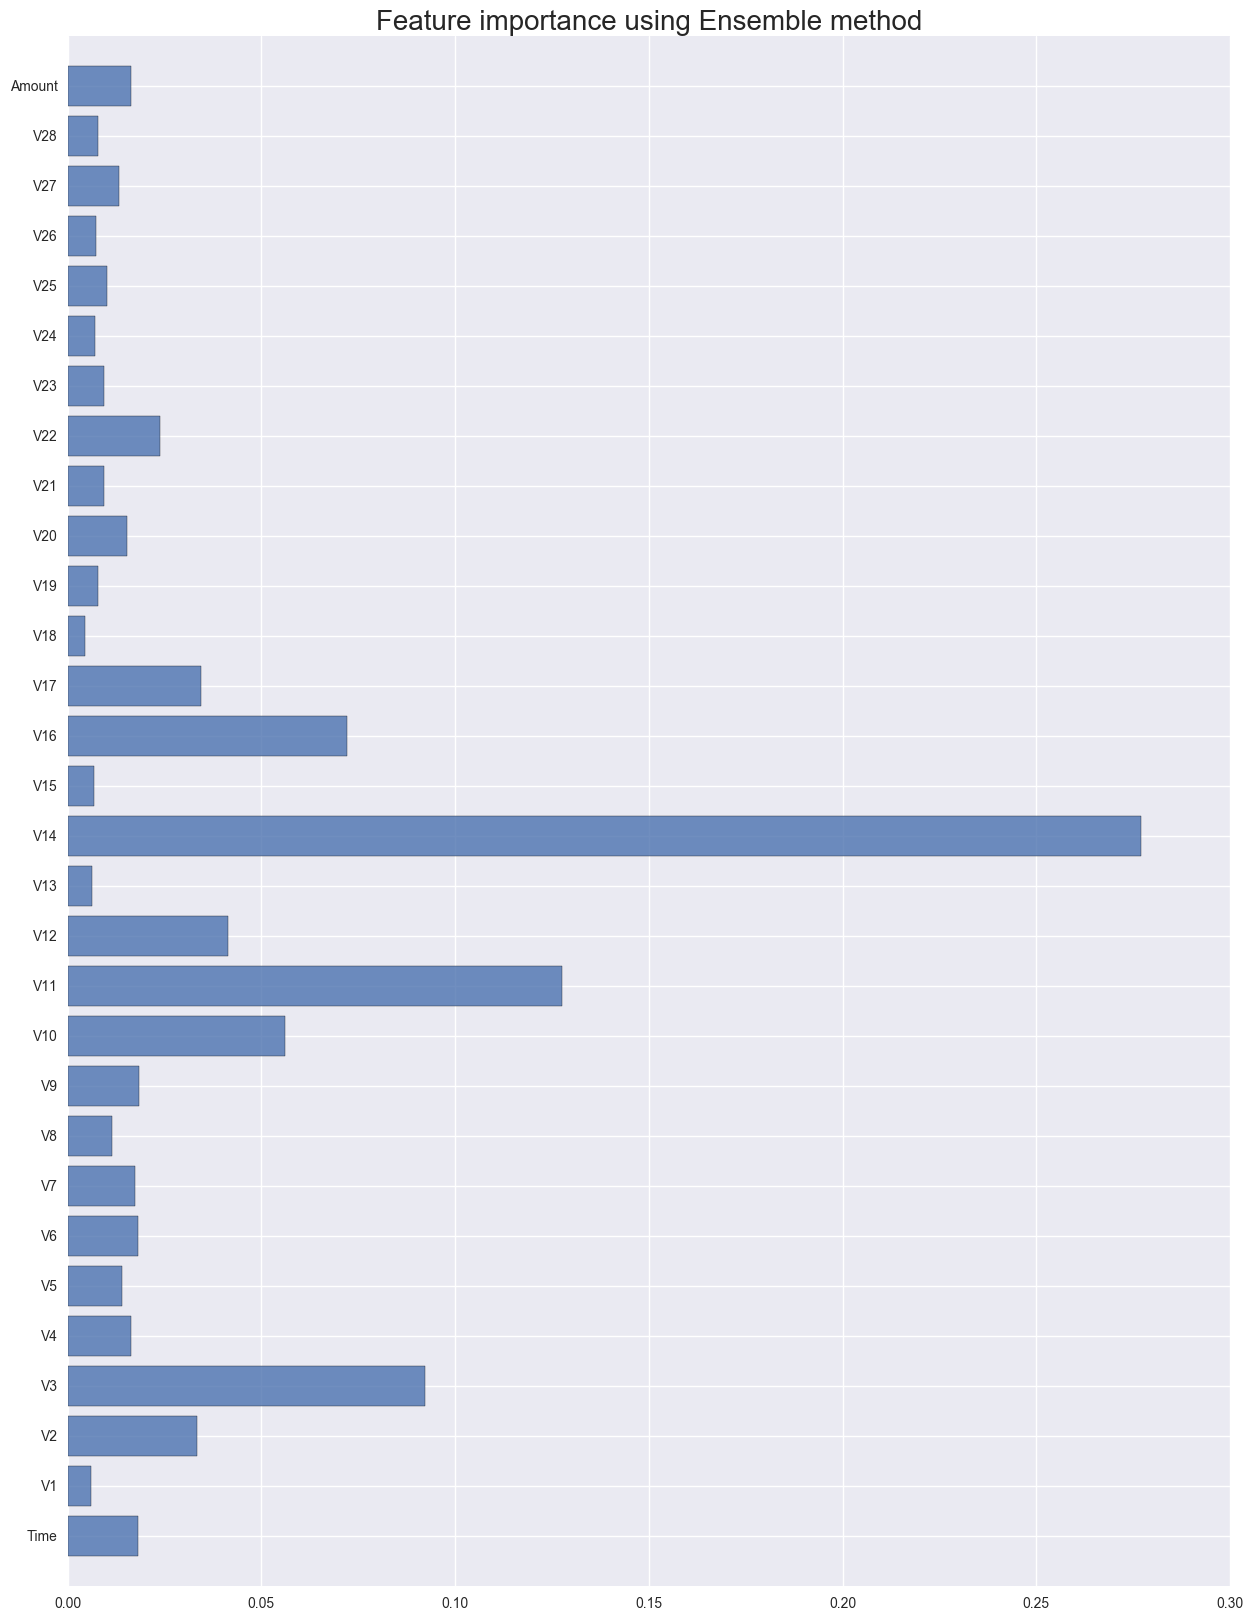

In [14]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(15,20))
et=ExtraTreeClassifier()
et=et.fit(X,y)
fi=et.feature_importances_
plt.barh(np.arange(len(feat.columns)),fi,align='center',alpha=0.8)
plt.yticks(np.arange(len(feat.columns)),list(feat.columns))
plt.title('Feature importance using Ensemble method',fontsize=20)
plt.ylim(-1,len(feat.columns))
plt.show()


Let's try by picking features with importance level greater than some threshold.

In [15]:
threshold=0.02
sel_features=list(feat.columns[np.where(fi>=threshold)])
sel_features

['V2', 'V3', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V22']

### Original model using ExtraTreeClassifier (no feature selection)

In [16]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(et,X,y)
score.mean()

0.99847616103704662

Let's see if we improve the score by taking only selected features

In [17]:
X_new=df[sel_features]
et=ExtraTreeClassifier()
et=et.fit(X_new,y)
print(cross_val_score(et,X_new,y).mean())

0.998704386295


Ofcourse not! You reduced the performance of the ensemble method by eliminating features. Duh! But what if we reduce this the current threshold...(I would be glad if someone can help me understanding this though)

In [18]:
Image(url='http://denisuca.com/wp-content/uploads/2014/06/thinking-meme-640x523.png')

In [19]:
threshold=0.01
sel_features=list(feat.columns[np.where(fi>=threshold)])
len(sel_features)

20

In [20]:
X_new=df[sel_features]
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(X_new,y)
print(cross_val_score(dt,X_new,y))

[ 0.99866226  0.99806185  0.99888345]


### So Accuracy > 99%

In [21]:
Image(url='https://cdn.meme.am/cache/images/folder883/5018883.jpg')